In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
cd /content/gdrive/My Drive/Resisc45

/content/gdrive/My Drive/Resisc45


In [0]:
!ls
!pwd

sample_data
/content


In [0]:
import datetime
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras import utils
import numpy as np


train_data_path = os.path.join('/content/gdrive/My Drive/Resisc45/data/train')
validation_data_path = os.path.join('/content/gdrive/My Drive/Resisc45/data/validation')

img_width, img_height = 64, 64
name = 'vgg'
nb_train_samples = 6720
nb_validation_samples = 840
batch_size = 32
classes_num = 12
epochs = 50
lr = .008


def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    model = applications.VGG16(include_top=False, weights='imagenet')

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    generator = datagen.flow_from_directory(
        train_data_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size + 1)
    with open('vgg_bottleneck_features_train.npy', 'wb') as features_train_file: 
        np.save(features_train_file, bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size + 1)
    with open('vgg_bottleneck_features_validation.npy', 'wb') as features_validation_file:
        np.save(features_validation_file, bottleneck_features_validation)

def train_top_model():
    # get train
    with open('vgg_bottleneck_features_train.npy', 'rb') as train_data_file:
        train_data = np.load(train_data_file)
    train_labels = np.arange(12)
    train_labels = np.repeat(train_labels, 560)
    train_labels = utils.to_categorical(train_labels, num_classes=12)

    # get test
    with open('vgg_bottleneck_features_validation.npy', 'rb') as validation_data_file:
        validation_data = np.load(validation_data_file)
    validation_labels = np.arange(12)
    validation_labels = np.repeat(validation_labels, 70)
    validation_labels = utils.to_categorical(validation_labels, num_classes=12)

    
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(classes_num, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # history
    history_callback = model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))

    loss_history = history_callback.history['loss']
    numpy_loss_history = np.array(loss_history)
    np.savetxt("./losses/loss_history-{}-{}.txt".format(name, datetime.datetime.now()), numpy_loss_history, delimiter=",")

    model.save('./models/{}-{}.h5'.format(name, datetime.datetime.now()))
    model.save_weights('./models/{}_weights-{}.h5'.format(name, datetime.datetime.now()))

#save_bottleneck_features()
#train_top_model()

Using TensorFlow backend.


In [0]:
train_top_model()

In [0]:
import datetime
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras import utils
import numpy as np
from keras.utils.np_utils import to_categorical


train_data_path = os.path.join('/content/gdrive/My Drive/Resisc45/data/train')
validation_data_path = os.path.join('/content/gdrive/My Drive/Resisc45/data/validation')

img_width, img_height = 64, 64
name = 'vgg'
nb_train_samples = 6720
nb_validation_samples = 840
batch_size = 32
classes_num = 12
epochs = 50
lr = .008


def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # VGG16 network built
    model = applications.VGG16(include_top=False, weights='imagenet')

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    generator = datagen.flow_from_directory(
        train_data_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    with open('vgg_bottleneck_features_train.npy', 'wb') as features_train_file: 
        np.save(features_train_file, bottleneck_features_train)

    
    generator = datagen.flow_from_directory(
        validation_data_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size + 1)
    with open('vgg_bottleneck_features_validation.npy', 'wb') as features_validation_file:
        np.save(features_validation_file, bottleneck_features_validation)

    
    
    
save_bottleneck_features()

Found 6720 images belonging to 12 classes.
Found 840 images belonging to 12 classes.


In [0]:
def train_top_model():
    # get train
    with open('vgg_bottleneck_features_train.npy', 'rb') as train_data_file:
        train_data = np.load(train_data_file)
    train_labels = np.arange(12)
    train_labels = np.repeat(train_labels, 560)
    train_labels = utils.to_categorical(train_labels, num_classes=12)

    # get test
    with open('vgg_bottleneck_features_validation.npy', 'rb') as validation_data_file:
        validation_data = np.load(validation_data_file)
    validation_labels = np.arange(12)
    validation_labels = np.repeat(validation_labels, 70)
    validation_labels = utils.to_categorical(validation_labels, num_classes=12)

    #sequential model
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.70))
    model.add(Dense(classes_num, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])
    
    

    # history information
    history_callback = model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))

    loss_history = history_callback.history['loss']
    numpy_loss_history = np.array(loss_history)
    np.savetxt("/content/gdrive/My Drive/Resisc45/losses/loss_history-{}-{}.txt".format(name, datetime.datetime.now()), numpy_loss_history, delimiter=",")

    model.save('/content/gdrive/My Drive/Resisc45/models/{}-{}.h5'.format(name, datetime.datetime.now()))
    model.save_weights('/content/gdrive/My Drive/Resisc45/models/{}_weights-{}.h5'.format(name, datetime.datetime.now()))
    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
    print("[INFO] Loss: {}".format(eval_loss))
    plt.figure(1)  
   
      

    plt.subplot(211)  
    plt.plot(history.history['acc'])  
    plt.plot(history.history['val_acc'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'val'], loc='upper left')  
  
   

    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'val'], loc='upper left')  
    plt.show()  

    
    
train_top_model()

Train on 6720 samples, validate on 840 samples
Epoch 1/50
6720/6720 [==============================] - 5s 755us/step - loss: 6.0504 - acc: 0.2818 - val_loss: 1.0618 - val_acc: 0.6274
Epoch 2/50
6720/6720 [==============================] - 3s 476us/step - loss: 1.1077 - acc: 0.6500 - val_loss: 0.9299 - val_acc: 0.7048
Epoch 3/50
6720/6720 [==============================] - 3s 471us/step - loss: 0.6865 - acc: 0.7833 - val_loss: 0.7272 - val_acc: 0.7702
Epoch 4/50
6720/6720 [==============================] - 3s 469us/step - loss: 0.5030 - acc: 0.8424 - val_loss: 1.1912 - val_acc: 0.7155
Epoch 5/50
6720/6720 [==============================] - 3s 469us/step - loss: 0.3561 - acc: 0.8882 - val_loss: 0.7339 - val_acc: 0.8036
Epoch 6/50
6720/6720 [==============================] - 3s 467us/step - loss: 0.2819 - acc: 0.9107 - val_loss: 0.9362 - val_acc: 0.7869
Epoch 7/50
6720/6720 [==============================] - 3s 478us/step - loss: 0.2401 - acc: 0.9283 - val_loss: 1.1570 - val_acc: 0.7845
E

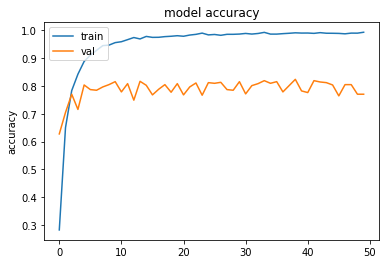

In [0]:
def train_top_model():
    # get train
    with open('vgg_bottleneck_features_train.npy', 'rb') as train_data_file:
        train_data = np.load(train_data_file)
    train_labels = np.arange(12)
    train_labels = np.repeat(train_labels, 560)
    train_labels = utils.to_categorical(train_labels, num_classes=12)

    # get test
    with open('vgg_bottleneck_features_validation.npy', 'rb') as validation_data_file:
        validation_data = np.load(validation_data_file)
    validation_labels = np.arange(12)
    validation_labels = np.repeat(validation_labels, 70)
    validation_labels = utils.to_categorical(validation_labels, num_classes=12)


    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    #model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.70))
    model.add(Dense(classes_num, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # history
    history = model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))

    loss_history = history.history['loss']
    numpy_loss_history = np.array(loss_history)
    np.savetxt("/content/gdrive/My Drive/Resisc45/losses/loss_history-{}-{}.txt".format(name, datetime.datetime.now()), numpy_loss_history, delimiter=",")

    model.save('/content/gdrive/My Drive/Resisc45/models/{}-{}.h5'.format(name, datetime.datetime.now()))
    model.save_weights('/content/gdrive/My Drive/Resisc45/models/{}_weights-{}.h5'.format(name, datetime.datetime.now()))
    (eval_loss, eval_accuracy) = model.evaluate(validation_data, validation_labels, batch_size=batch_size, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
    print("[INFO] Loss: {}".format(eval_loss))
    plt.figure(1)  
    
 
    plt.plot(history.history['acc'])  
    plt.plot(history.history['val_acc'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('')  
    plt.legend(['train', 'val'], loc='upper left')  
    plt.show()
    

    
train_top_model()




Train on 6720 samples, validate on 840 samples
Epoch 1/25
6720/6720 [==============================] - 9s 1ms/step - loss: 2.8424 - acc: 0.3638 - val_loss: 1.1129 - val_acc: 0.6643
Epoch 2/25
6720/6720 [==============================] - 2s 345us/step - loss: 1.3437 - acc: 0.5601 - val_loss: 1.0431 - val_acc: 0.6548
Epoch 3/25
6720/6720 [==============================] - 2s 343us/step - loss: 1.1025 - acc: 0.6338 - val_loss: 0.9189 - val_acc: 0.7119
Epoch 4/25
6720/6720 [==============================] - 2s 343us/step - loss: 0.9449 - acc: 0.6862 - val_loss: 0.7635 - val_acc: 0.7571
Epoch 5/25
6720/6720 [==============================] - 2s 345us/step - loss: 0.8456 - acc: 0.7207 - val_loss: 0.6703 - val_acc: 0.8095
Epoch 6/25
6720/6720 [==============================] - 2s 345us/step - loss: 0.7508 - acc: 0.7519 - val_loss: 0.7059 - val_acc: 0.7845
Epoch 7/25
6720/6720 [==============================] - 2s 350us/step - loss: 0.6987 - acc: 0.7701 - val_loss: 0.6808 - val_acc: 0.8024
Epo

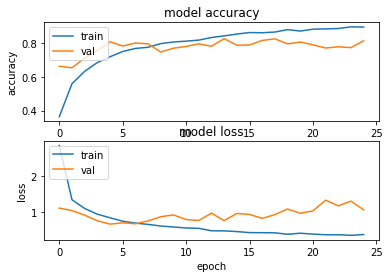

In [0]:
def train_top_model():
    # get train
    with open('vgg_bottleneck_features_train.npy', 'rb') as train_data_file:
        train_data = np.load(train_data_file)
    train_labels = np.arange(12)
    train_labels = np.repeat(train_labels, 560)
    train_labels = utils.to_categorical(train_labels, num_classes=12)

    # get test
    with open('vgg_bottleneck_features_validation.npy', 'rb') as validation_data_file:
        validation_data = np.load(validation_data_file)
    validation_labels = np.arange(12)
    validation_labels = np.repeat(validation_labels, 70)
    validation_labels = utils.to_categorical(validation_labels, num_classes=12)

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.50))
    model.add(Dense(classes_num, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # history
    history = model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))

    loss_history = history.history['loss']
    numpy_loss_history = np.array(loss_history)
    np.savetxt("/content/gdrive/My Drive/Resisc45/losses/loss_history-{}-{}.txt".format(name, datetime.datetime.now()), numpy_loss_history, delimiter=",")

    model.save('/content/gdrive/My Drive/Resisc45/models/{}-{}.h5'.format(name, datetime.datetime.now()))
    model.save_weights('/content/gdrive/My Drive/Resisc45/models/{}_weights-{}.h5'.format(name, datetime.datetime.now()))
    (eval_loss, eval_accuracy) = model.evaluate(validation_data, validation_labels, batch_size=batch_size, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
    print("[INFO] Loss: {}".format(eval_loss))
    plt.figure(1)  
   

    plt.subplot(211)  
    plt.plot(history.history['acc'])  
    plt.plot(history.history['val_acc'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('')  
    plt.legend(['train', 'val'], loc='upper left')  
  

    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'val'], loc='upper left')  
    plt.show()  

  


    
train_top_model()




Found 840 images belonging to 12 classes.
[0.8591549295774648, 0.7647058823529411, 0.6385542168674698, 0.927536231884058, 0.810126582278481, 0.8305084745762712, 0.9078947368421053, 0.9508196721311475, 0.8888888888888888, 0.8709677419354839, 0.825, 0.6666666666666666]
Average recall: 4.819444444444445
Average precision: 0.06903350016667346
Normalized confusion matrix
[[0.87142857 0.04285714 0.01428571 0.         0.01428571 0.01428571
  0.         0.         0.01428571 0.         0.02857143 0.        ]
 [0.02857143 0.74285714 0.05714286 0.         0.         0.01428571
  0.02857143 0.         0.         0.         0.07142857 0.05714286]
 [0.02857143 0.05714286 0.75714286 0.01428571 0.         0.
  0.         0.         0.01428571 0.         0.02857143 0.1       ]
 [0.         0.         0.01428571 0.91428571 0.         0.01428571
  0.         0.         0.05714286 0.         0.         0.        ]
 [0.02857143 0.01428571 0.02857143 0.         0.91428571 0.
  0.01428571 0.         0.     

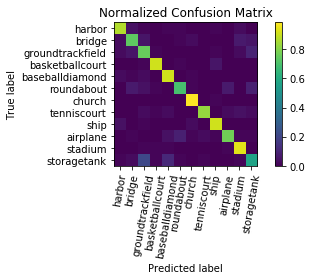

In [0]:

#Confusion matrix

import datetime
import sys
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras import utils
import numpy as np
from keras.layers import Input, Flatten, Dropout, Concatenate, Activation, Dense
from sklearn import metrics
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
 

img_width, img_height = 64, 64

model_path = '/content/gdrive/My Drive/Resisc45/models/vgg-2019-05-15 19:06:35.076044.h5'
model_weights_path = '/content/gdrive/My Drive/Resisc45/models/vgg_weights-2019-05-15 19:06:36.939751.h5'

test_data_path = '/content/gdrive/My Drive/Resisc45/data/test'

img_width, img_height = 64, 64

nb_train_samples = 6720 
nb_validation_samples = 840 
batch_size = 32 
classes_num = 12
epochs = 50
lr = .008

model = applications.VGG16(include_top=False, weights='imagenet')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
    )

test_data = model.predict_generator(test_generator, 840 // batch_size + 1)


top_model = load_model(model_path)
top_model.load_weights(model_weights_path)

test_labels = np.arange(classes_num)
test_labels = np.repeat(test_labels, 70)

test_preds = top_model.predict(test_data)
test_preds = np.argmax(test_preds, axis=-1)

class_list = ['']
for subdir, dirs, files in os.walk('/content/gdrive/My Drive/Resisc45/data'):
  if subdir.startswith('/content/gdrive/My Drive/Resisc45/data/train/'):
    name = subdir[45:]
    if name.startswith('.'):
        continue
    class_list.append(name)

class_list = class_list[1:]
conf = metrics.confusion_matrix(test_labels, test_preds)

recall = [0] * classes_num
precision_predicted = [0] * classes_num
precision_actual = [0] * classes_num

for i in range(0, len(test_preds)):
    if test_preds[i] == test_labels[i]:
        recall[i//70] += 1
        precision_actual[test_preds[i]] += 1
    precision_predicted[test_preds[i]] += 1

precision_stats = []
for i in range(0, classes_num):
    if precision_predicted[i] > 0:
        precision_stats.append(precision_actual[i] / precision_predicted[i])
    else:
        precision_stats.append(0)
print(precision_stats)

print("Average recall: {}".format(str(float(sum(recall)) / len(recall)  / classes_num )))
print("Average precision: {}".format(str(float(sum(precision_stats)) / len(precision_stats) / classes_num )))


plt.figure()

def plot_confusion_matrix(conf, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='binary'):
    if normalize:
        cm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=80)
    plt.yticks(tick_marks, classes)


    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plot_confusion_matrix(conf, class_list, normalize=True, title='Confusion Matrix')
plt.show()

Found 840 images belonging to 12 classes.
[0.8356164383561644, 0.7796610169491526, 0.6063829787234043, 0.9142857142857143, 0.875, 0.7037037037037037, 0.9324324324324325, 0.9253731343283582, 0.9365079365079365, 0.8709677419354839, 0.9545454545454546, 0.7288135593220338]
Average recall: 4.847222222222222
Average precision: 0.06988395910479055
Normalized confusion matrix
[[0.87142857 0.02857143 0.04285714 0.         0.02857143 0.02857143
  0.         0.         0.         0.         0.         0.        ]
 [0.02857143 0.65714286 0.05714286 0.         0.         0.12857143
  0.01428571 0.01428571 0.         0.         0.01428571 0.08571429]
 [0.04285714 0.         0.81428571 0.01428571 0.         0.01428571
  0.         0.         0.         0.         0.01428571 0.1       ]
 [0.         0.         0.01428571 0.91428571 0.         0.01428571
  0.01428571 0.01428571 0.02857143 0.         0.         0.        ]
 [0.01428571 0.01428571 0.02857143 0.         0.9        0.
  0.         0.014285

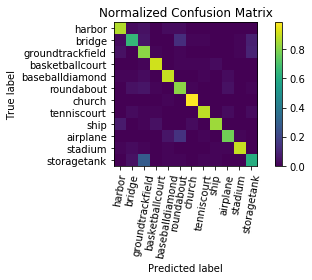

In [0]:
import datetime
import sys
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras import utils
import numpy as np
from keras.layers import Input, Flatten, Dropout, Concatenate, Activation, Dense
from sklearn import metrics
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
 

img_width, img_height = 64, 64

model_path = '/content/gdrive/My Drive/Resisc45/models/vgg-2019-05-13 01:24:33.944442.h5'
model_weights_path = '/content/gdrive/My Drive/Resisc45/models/vgg_weights-2019-05-13 01:24:37.868596.h5'

test_data_path = '/content/gdrive/My Drive/Resisc45/data/test'

img_width, img_height = 64, 64



nb_train_samples = 6720 
nb_validation_samples = 840 
batch_size = 32 
classes_num = 12
epochs = 50
lr = .008


model = applications.VGG16(include_top=False, weights='imagenet')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
    )

test_data = model.predict_generator(test_generator, 840 // batch_size + 1)


top_model = load_model(model_path)
top_model.load_weights(model_weights_path)

test_labels = np.arange(classes_num)
test_labels = np.repeat(test_labels, 70)

test_preds = top_model.predict(test_data)
test_preds = np.argmax(test_preds, axis=-1)

class_list = ['']
for subdir, dirs, files in os.walk('/content/gdrive/My Drive/Resisc45/data'):
  if subdir.startswith('/content/gdrive/My Drive/Resisc45/data/train/'):
    name = subdir[45:]
    if name.startswith('.'):
        continue
    class_list.append(name)

class_list = class_list[1:]
conf = metrics.confusion_matrix(test_labels, test_preds)

recall = [0] * classes_num
precision_predicted = [0] * classes_num
precision_actual = [0] * classes_num

for i in range(0, len(test_preds)):
    if test_preds[i] == test_labels[i]:
        recall[i//70] += 1
        precision_actual[test_preds[i]] += 1
    precision_predicted[test_preds[i]] += 1

precision_stats = []
for i in range(0, classes_num):
    if precision_predicted[i] > 0:
        precision_stats.append(precision_actual[i] / precision_predicted[i])
    else:
        precision_stats.append(0)
print(precision_stats)

print("Average recall: {}".format(str(float(sum(recall)) / len(recall)  / classes_num )))
print("Average precision: {}".format(str(float(sum(precision_stats)) / len(precision_stats) / classes_num )))


plt.figure()

def plot_confusion_matrix(conf, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=80)
    plt.yticks(tick_marks, classes)


    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plot_confusion_matrix(conf, class_list, normalize=True, title='Normalized Confusion Matrix')
plt.show()